<a href="https://colab.research.google.com/github/marcelomoresco/trabalho-martin/blob/main/trabalho_martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib statsmodels pmdarima scikit-learn


NOMES: MARCELO ADRIEL MORESCO E YAGO

Dados carregados com sucesso.
                     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-01-01 00:00:00    -1.8              -3.9         86                4   
2012-01-01 01:00:00    -1.8              -3.7         87                4   
2012-01-01 02:00:00    -1.8              -3.4         89                7   
2012-01-01 03:00:00    -1.5              -3.2         88                6   
2012-01-01 04:00:00    -1.5              -3.3         88                7   

                     Visibility_km  Press_kPa               Weather  
Date/Time                                                            
2012-01-01 00:00:00            8.0     101.24                   Fog  
2012-01-01 01:00:00            8.0     101.24                   Fog  
2012-01-01 02:00:00            4.0     101.26  Freezing Drizzle,Fog  
2012-01-01 03:00:00            4.0     101.27  Freezing Drizzle,Fog  
2012-01-01

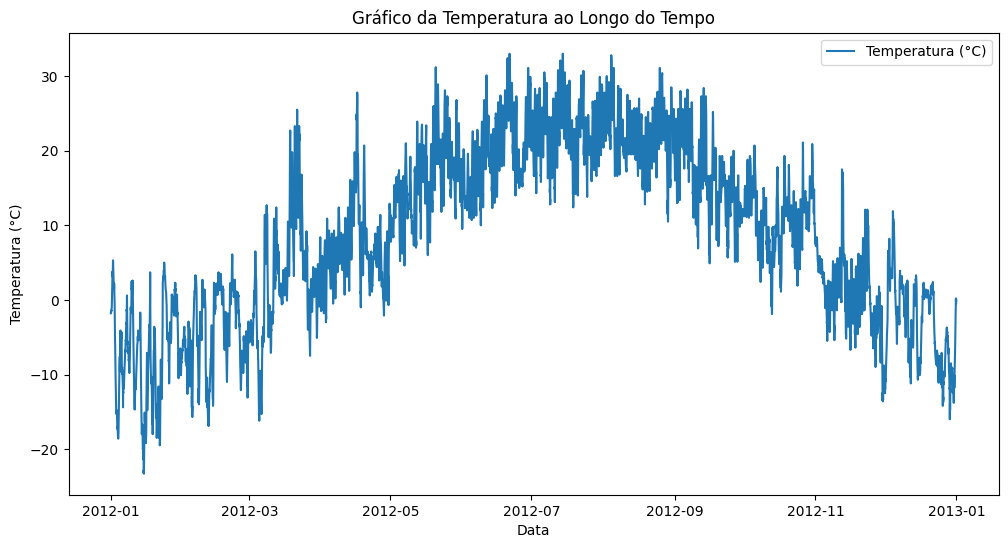

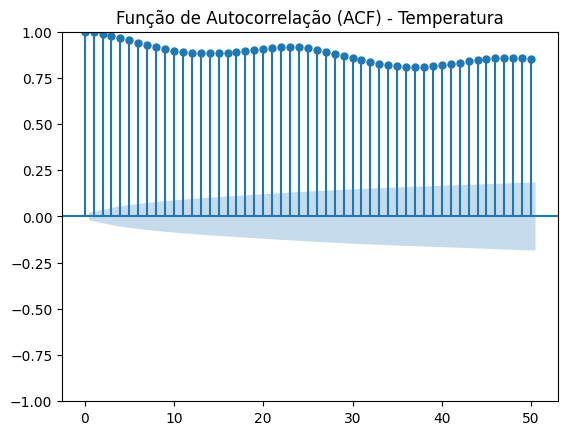

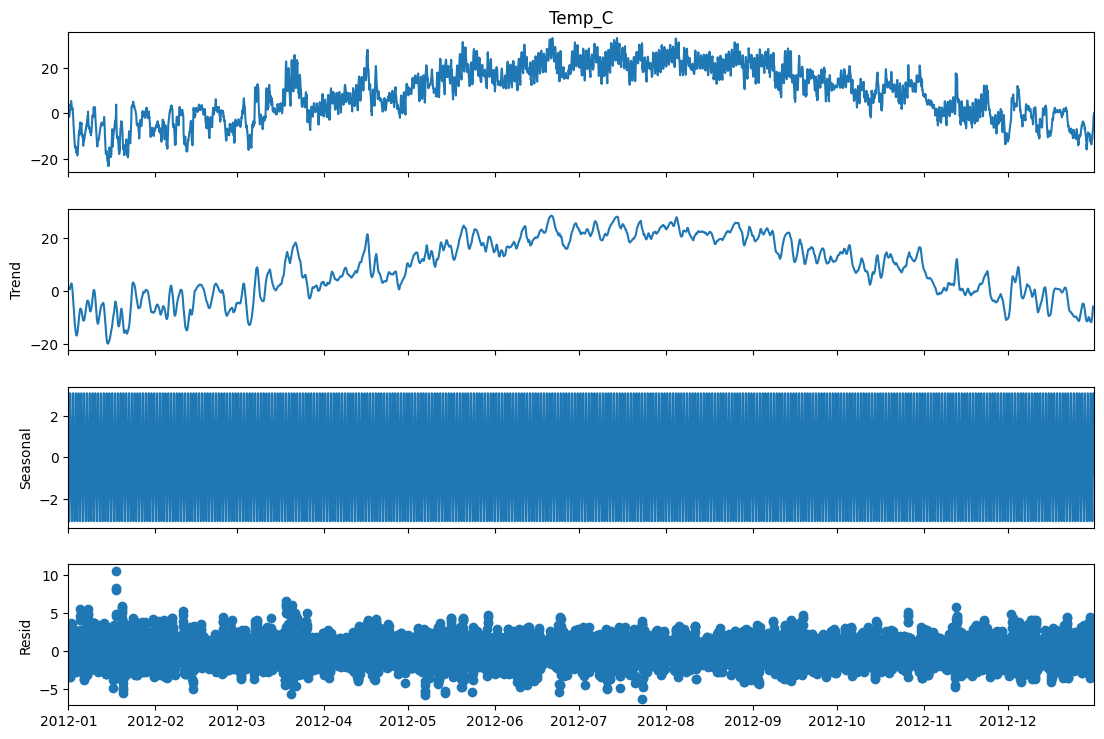

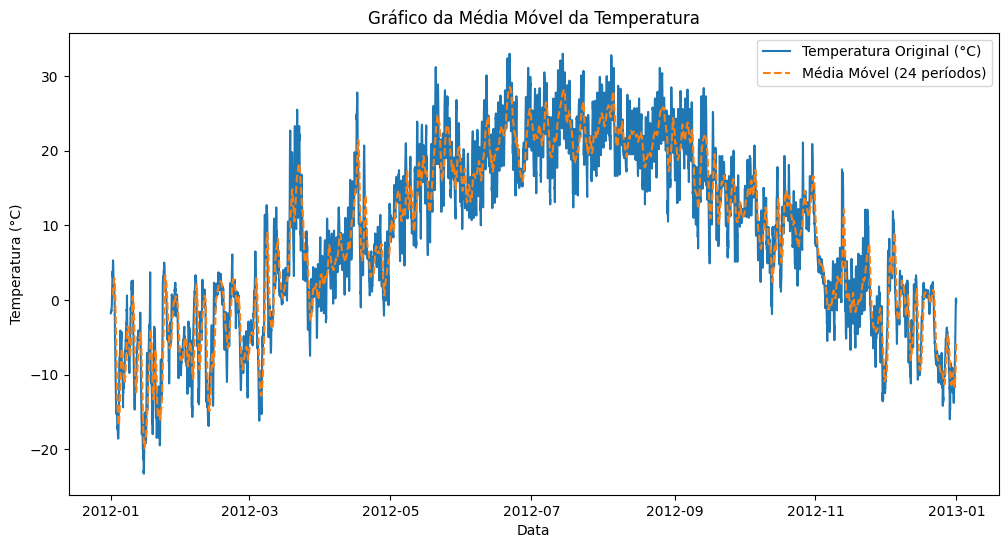

Teste Dickey-Fuller Aumentado (ADF):
Estatística ADF: -3.252861307848841
Valor-p: 0.017121636154745216
Valores Críticos:
1%: -3.431
5%: -2.862
10%: -2.567


In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

# Carregar o dataset a partir do arquivo fornecido
df = pd.read_csv('/content/sample_data/temporal_dataset.csv', parse_dates=['Date/Time'], index_col='Date/Time')
print("Dados carregados com sucesso.")

# Visualização dos dados iniciais
print(df.head())

# Selecionando a coluna 'Temp_C' para análise
# Passo 1: Plotar o gráfico dos dados e justificar se é uma série temporal
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temp_C'], label='Temperatura (°C)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.title('Gráfico da Temperatura ao Longo do Tempo')
plt.legend()
plt.show()

# Justificação: Como os dados são observados ao longo do tempo com uma sequência cronológica, podemos considerá-los uma série temporal.

# Passo 2: Identificar o Lag da Série Temporal
# Utilizamos a autocorrelação para determinar o "lag" (atraso) relevante na série
plot_acf(df['Temp_C'].dropna(), lags=50)
plt.title("Função de Autocorrelação (ACF) - Temperatura")
plt.show()

# Observação: O lag é o ponto em que a correlação diminui de forma significativa.

# Passo 3: Identificar Sazonalidade e Tendência
# Decomposição da série temporal para verificar sazonalidade e tendência
decomposition = sm.tsa.seasonal_decompose(df['Temp_C'].dropna(), model='additive', period=24)  # Assume-se um período diário

# Plotando os componentes da decomposição
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Passo 4: Gráfico da Média Móvel
# Definindo o tamanho da janela com base no período diário
window_size = 24  # Média móvel de 24 horas (ou outro valor que faça sentido)

# Calculando a média móvel
df['Média_Móvel'] = df['Temp_C'].rolling(window=window_size).mean()

# Plotando a média móvel junto com os dados originais
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temp_C'], label='Temperatura Original (°C)')
plt.plot(df.index, df['Média_Móvel'], label=f'Média Móvel ({window_size} períodos)', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.title('Gráfico da Média Móvel da Temperatura')
plt.legend()
plt.show()

# Passo 5: Verificar se a Série Temporal é Estacionária
# Utilizamos o teste de Dickey-Fuller aumentado (ADF) para verificar a estacionariedade
adf_result = adfuller(df['Temp_C'].dropna())
print("Teste Dickey-Fuller Aumentado (ADF):")
print(f"Estatística ADF: {adf_result[0]}")
print(f"Valor-p: {adf_result[1]}")
print("Valores Críticos:")
for key, value in adf_result[4].items():
    print(f"{key}: {value:.3f}")

# Interpretação:
# Se o valor-p for menor que 0,05, rejeitamos a hipótese nula e consideramos a série como estacionária.
# Caso contrário, a série é não estacionária.
